In [95]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from PIL import Image
%matplotlib inline

In [96]:
# Load movies
movies = pd.read_csv("./small_data/ml-latest-small/movies.csv")
#movies = movies.replace({np.nan: None}) # replace NaN with None
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [97]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [98]:
movies.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [99]:
# Load movies
ratings = pd.read_csv("./small_data/ml-latest-small/ratings.csv")
#ratings = ratings.replace({np.nan: None}) # replace NaN with None
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [100]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [101]:
ratings.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

In [102]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action|Crime|Thriller,1995
6,7,Sabrina,Comedy|Romance,1995
7,8,Tom and Huck,Adventure|Children,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action|Adventure|Thriller,1995


In [103]:
#Every genre is separated by a | so we simply have to call the split function on |
movies['genres'] = movies.genres.str.split('|')
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995
5,6,Heat,"[Action, Crime, Thriller]",1995
6,7,Sabrina,"[Comedy, Romance]",1995
7,8,Tom and Huck,"[Adventure, Children]",1995
8,9,Sudden Death,[Action],1995
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995


In [104]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres = movies.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies.iterrows():
    for genre in row['genres']:
        moviesWithGenres.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres = moviesWithGenres.fillna(0)
moviesWithGenres.head(10)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Heat,"[Action, Crime, Thriller]",1995,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,Sabrina,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,Tom and Huck,"[Adventure, Children]",1995,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Sudden Death,[Action],1995,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#Drop removes a specified row or column from a dataframe
ratings = ratings.drop('timestamp', 1)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [106]:
#Merge is a function that combines all the rows of the dataset with the specified dataframe.
data = ratings.merge(movies,on='movieId', how='left')
data.head(10)

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,1,3,4.0,Grumpier Old Men,"[Comedy, Romance]",1995
2,1,6,4.0,Heat,"[Action, Crime, Thriller]",1995
3,1,47,5.0,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995
4,1,50,5.0,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995
5,1,70,3.0,From Dusk Till Dawn,"[Action, Comedy, Horror, Thriller]",1996
6,1,101,5.0,Bottle Rocket,"[Adventure, Comedy, Crime, Romance]",1996
7,1,110,4.0,Braveheart,"[Action, Drama, War]",1995
8,1,151,5.0,Rob Roy,"[Action, Drama, Romance, War]",1995
9,1,157,5.0,Canadian Bacon,"[Comedy, War]",1995


# EDA

## Wordcloud

In [108]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
df = pd.read_csv('small_data/ml-latest-small/tags.csv')
df = df.merge(movies, on='movieId', how = 'left')

In [110]:
df.head()

,userId,movieId,tag,timestamp,title,genres,year
0,2,60756,funny,1445714994,Step Brothers,[Comedy],2008
1,2,60756,Highly quotable,1445714996,Step Brothers,[Comedy],2008
2,2,60756,will ferrell,1445714992,Step Brothers,[Comedy],2008
3,2,89774,Boxing story,1445715207,Warrior,[Drama],2011
4,2,89774,MMA,1445715200,Warrior,[Drama],2011


In [111]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} titles in this dataset such as {}... \n".format(len(df.title.unique()),
                                                                           ", ".join(df.title.unique()[0:5])))

There are 3683 observations and 7 features in this dataset. 

There are 1560 titles in this dataset such as Step Brothers, Warrior, Wolf of Wall Street, The, Departed, The, Carlito's Way... 



In [112]:
?WordCloud

In [113]:
text = " ".join(word for word in df.tag)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 41030 words in the combination of all review.


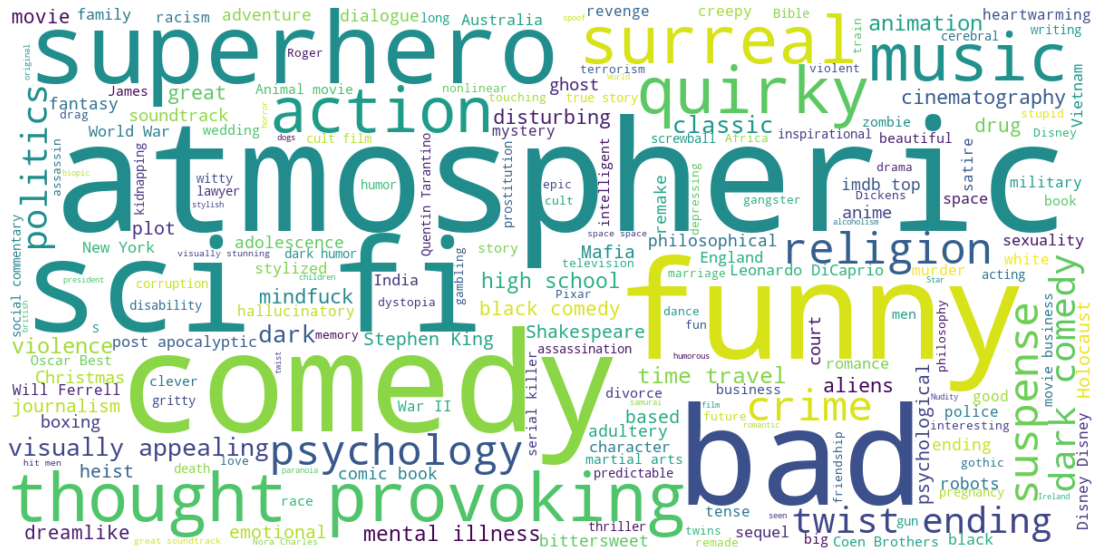

In [114]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Netflix", 'queue'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1200, height=600).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [115]:
wordcloud.to_file("images/tags_cloud.png")

## Ratings

In [116]:
data['title'].value_counts()

Forrest Gump                                                       329
Shawshank Redemption, The                                          317
Pulp Fiction                                                       307
Silence of the Lambs, The                                          279
Matrix, The                                                        278
                                                                  ... 
Death Wish 5: The Face of Death                                      1
Family Guy Presents: Something, Something, Something, Dark Side      1
My Name Is Joe                                                       1
High School                                                          1
Year of the Dragon                                                   1
Name: title, Length: 9446, dtype: int64

In [76]:
grouped = data.groupby('title')['rating'].mean().reset_index()
grouped.sort_values('rating', ascending=False)

,title,rating
3863,Hollywood Chainsaw Hookers,5.0
1473,"Calcium Kid, The",5.0
1692,Chinese Puzzle (Casse-tête chinois),5.0
6742,Raise Your Voice,5.0
6738,Rain,5.0
...,...,...
457,Anaconda: The Offspring,0.5
7945,Superfast!,0.5
2414,Don't Look Now,0.5
9369,Yongary: Monster from the Deep,0.5


# Content Filtering

In [13]:
userInput = [
            {'title':'Fast & Furious (Fast and the Furious 4, The)', 'rating':4},
            {'title':'Jumanji: Welcome to the Jungle', 'rating':4.5},
            {'title':'Secret Superstar', 'rating':3},
            {'title':"Captain Marvel", 'rating':3.5},
            {'title':'Intern, The', 'rating':5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Fast & Furious (Fast and the Furious 4, The)",4.0
1,Jumanji: Welcome to the Jungle,4.5
2,Secret Superstar,3.0
3,Captain Marvel,3.5
4,"Intern, The",5.0


In [14]:
#Filtering out the movies by title
inputId = movies[movies['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

,movieId,title,rating
0,67923,"Fast & Furious (Fast and the Furious 4, The)",4.0
1,79022,"Intern, The",5.0
2,122910,Captain Marvel,3.5
3,179397,Secret Superstar,3.0
4,179401,Jumanji: Welcome to the Jungle,4.5


In [15]:
#Filtering out the movies from the input
userMovies = moviesWithGenres[moviesWithGenres['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
13666,67923,"Fast & Furious (Fast and the Furious 4, The)","[Action, Crime, Drama, Thriller]",2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15583,79022,"Intern, The",[Comedy],2000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27558,122910,Captain Marvel,"[Action, Adventure, Sci-Fi]",2018,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51804,179397,Secret Superstar,[Drama],2017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51806,179401,Jumanji: Welcome to the Jungle,"[Action, Adventure, Children]",2017,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
inputMovies['rating']

0    4.0
1    5.0
2    3.5
3    3.0
4    4.5
Name: rating, dtype: float64

In [18]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
userProfile

Adventure              8.0
Animation              0.0
Children               4.5
Comedy                 5.0
Fantasy                0.0
Romance                0.0
Drama                  7.0
Action                12.0
Crime                  4.0
Thriller               4.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 3.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

In [19]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres.set_index(moviesWithGenres['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
genreTable.shape

(58098, 20)

In [21]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable.head()

movieId
1    0.364583
2    0.260417
3    0.104167
4    0.250000
5    0.104167
dtype: float64

In [22]:
#Sort our recommendations in descending order
recommendationTable = recommendationTable.sort_values(ascending=False)
#Just a peek at the values
recommendationTable.head()

movieId
144324    0.833333
122787    0.833333
81132     0.833333
64645     0.833333
115479    0.802083
dtype: float64

In [23]:
#The final recommendation table
movies.loc[movies['movieId'].isin(recommendationTable.head(20).keys())]

,movieId,title,genres,year
455,459,"Getaway, The","[Action, Adventure, Crime, Drama, Romance, Thr...",1994
4861,4956,"Stunt Man, The","[Action, Adventure, Comedy, Drama, Romance, Th...",1980
5559,5657,Flashback,"[Action, Adventure, Comedy, Crime, Drama]",1990
6879,6990,The Great Train Robbery,"[Action, Adventure, Comedy, Crime, Drama]",1978
9465,27735,Unstoppable,"[Action, Adventure, Comedy, Drama, Thriller]",2004
12139,55116,"Hunting Party, The","[Action, Adventure, Comedy, Drama, Thriller]",2007
13271,64645,The Wrecking Crew,"[Action, Adventure, Comedy, Crime, Drama, Thri...",1968
13831,69095,Graduation,"[Action, Adventure, Comedy, Crime, Drama]",2007
16105,81132,Rubber,"[Action, Adventure, Comedy, Crime, Drama, Film...",2010
16560,83266,Kaho Naa... Pyaar Hai,"[Action, Adventure, Comedy, Drama, Mystery, Ro...",2000


# Collaborative Filtering

In [24]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings[ratings['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

,userId,movieId,rating
8594,81,67923,0.5
13057,134,67923,4.0
17216,173,67923,1.0
33183,321,67923,2.5
35499,339,179401,5.0


In [25]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])

In [27]:
# userSubsetGroup.get_group(249)

In [28]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [29]:
userSubsetGroup[0:3]

[(76798,
           userId  movieId  rating
  7462938   76798    67923     4.5
  7463219   76798   179397     4.5
  7463220   76798   179401     4.0),
 (2745,
          userId  movieId  rating
  280682    2745    67923     3.0
  281454    2745   179401     2.5),
 (4044,
          userId  movieId  rating
  394299    4044    67923     3.5
  394642    4044   179401     3.0)]

In [30]:
userSubsetGroup = userSubsetGroup[0:100]

In [31]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        val = (Sxx*Syy)**(1/2)
        pearsonCorrelationDict[name] = Sxy/(val)
    else:
        pearsonCorrelationDict[name] = 0

In [32]:
pearsonCorrelationDict.items()

dict_items([(76798, -0.755928946018466), (2745, -1.0), (4044, -1.0), (4048, 0), (4203, -1.0), (4302, -1.0), (4806, 1.0), (4871, -1.0), (4999, 1.0), (5176, 1.0), (8348, -1.0), (10073, 1.0), (10913, 0), (11655, -1.0), (11863, -1.0), (13534, -1.0), (15633, 0), (15798, 1.0), (19303, 0), (22947, 1.0), (23572, -1.0), (23649, 1.0), (25288, 0), (27414, 1.0), (27511, 0), (29315, 0), (30447, 1.0), (33605, 1.0), (33676, -1.0), (34013, 1.0), (37046, -1.0), (37782, 0), (38240, 1.0), (38616, -1.0), (38807, 1.0), (41520, 1.0), (41903, -1.0), (41954, -1.0), (42377, 1.0), (42775, 1.0), (44317, 0), (44654, 1.0), (45614, -1.0), (46177, 1.0), (49534, 1.0), (50678, 1.0), (50870, 0), (57392, 1.0), (57600, 1.0), (58920, 1.0), (59611, -1.0), (59757, 1.0), (61801, 1.0), (61993, -1.0), (62705, 1.0), (63353, 1.0), (63594, -1.0), (65868, 0), (66338, 1.0), (66978, -1.0), (67369, 1.0), (69452, 1.0), (69636, 1.0), (69860, 1.0), (70271, 0), (71277, 0), (72541, 0), (72675, 1.0), (73236, -1.0), (74447, 1.0), (77319, 1.

In [33]:
pearsonData = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonData.columns = ['similarityIndex']
pearsonData['userId'] = pearsonData.index
pearsonData.index = range(len(pearsonData))
pearsonData.head()

,similarityIndex,userId
0,-0.755929,76798
1,-1.000000,2745
2,-1.000000,4044
3,0.000000,4048
4,-1.000000,4203


In [34]:
topUsers=pearsonData.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
99,1.0,103808
85,1.0,89563
34,1.0,38807
71,1.0,77663
82,1.0,88042


In [35]:
topUsersRating=topUsers.merge(ratings, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,1.0,103808,19,5.0
1,1.0,103808,47,5.0
2,1.0,103808,50,4.5
3,1.0,103808,70,1.0
4,1.0,103808,110,4.0


In [36]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,1.0,103808,19,5.0,5.0
1,1.0,103808,47,5.0,5.0
2,1.0,103808,50,4.5,4.5
3,1.0,103808,70,1.0,1.0
4,1.0,103808,110,4.0,4.0


In [37]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,42.0,170.5
2,34.0,124.0
3,12.0,38.5
4,1.0,3.0
5,11.0,33.5


In [38]:
#Creates an empty dataframe
recommendation_data = pd.DataFrame()
#Now we take the weighted average
recommendation_data['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_data['movieId'] = tempTopUsersRating.index
recommendation_data.head()

,weighted average recommendation score,movieId
movieId,,
1,4.059524,1
2,3.647059,2
3,3.208333,3
4,3.000000,4
5,3.045455,5


In [39]:
recommendation = recommendation_data.sort_values(by='weighted average recommendation score', ascending=False)
recommendation.head(10)

,weighted average recommendation score,movieId
movieId,,
160380,5.0,160380
115565,5.0,115565
152298,5.0,152298
152579,5.0,152579
55603,5.0,55603
153857,5.0,153857
115953,5.0,115953
115951,5.0,115951
115828,5.0,115828


In [40]:
movies.loc[movies['movieId'].isin(recommendation.head(10)['movieId'].tolist())]

,movieId,title,genres,year
12218,55603,My Mom's New Boyfriend,"[Action, Comedy, Romance, Thriller]",2008
24989,115565,S.W.A.T.: Firefight,"[Action, Crime, Thriller]",2011
25043,115770,Before I Disappear,[Drama],2014
25060,115828,Copenhagen,"[Adventure, Drama, Romance]",2014
25106,115951,Stranded,"[Horror, Sci-Fi]",2013
25107,115953,Special Forces,"[Action, Thriller, War]",2003
39594,152298,Trevor Noah: The Daywalker,[Comedy],2009
39714,152579,Regular Show: The Movie,"[Animation, Comedy, Sci-Fi]",2015
40312,153857,Body Language,"[Romance, Thriller]",1995
43086,160380,Suited,[(no genres listed)],2016


# Lab

In [41]:
ratings_df = pd.read_csv('./data/ratings.csv')

In [42]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [43]:
ratings_df.shape

(27753444, 4)

In [44]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [45]:
new_df = ratings_df.drop(columns='timestamp')

In [46]:
from surprise import Reader, Dataset
# read in values as Surprise dataset 

reader = Reader()
data = Dataset.load_from_df(new_df,reader)

In [47]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  283228 

Number of items:  53889


In [48]:
# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.baseline_only import BaselineOnly
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.prediction_algorithms.slope_one import SlopeOne
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

### Collaborative Filtering Using SVD

In [ ]:
## Perform a gridsearch with SVD
# ⏰ This cell may take several minutes to run
params = {'n_factors': [20, 100],
         'reg_all': [0.02, 0.1]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

C:\Users\nehcr\anaconda3\envs\learn-env\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# print out optimal parameters for SVD after GridSearch
print(g_s_svd.best_score)
print(g_s_svd.best_params)

### Collaborative Filtering with SVD++

In [ ]:
## Perform a gridsearch with SVDpp
# ⏰ This cell may take several minutes to run
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}
g_s_svdpp = GridSearchCV(SVDpp,param_grid=params,n_jobs=-1)
g_s_svdpp.fit(data)

In [ ]:
# print out optimal parameters for SVD after GridSearch
print(g_s_svdpp.best_score)
print(g_s_svdpp.best_params)

### Collaborative Filtering Using KNN Basic

In [49]:
# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

KeyboardInterrupt: 

In [1]:
# print out the average RMSE score for the test set
for i in cv_knn_basic.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

NameError: name 'cv_knn_basic' is not defined

In [ ]:
# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline,data)

In [ ]:
# print out the average score for the test set
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

In [ ]:
### Collaborative Filtering Using Knn_basic

# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

# print out the average RMSE score for the test set
for i in cv_knn_basic.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline,data)

# print out the average score for the test set
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

### Recs with SVD

In [ ]:
df_movies = pd.read_csv('./data/movies.csv')

In [ ]:
df_movies.head()

In [ ]:
svd = SVD(n_factors= 50, reg_all=0.05)
svd.fit(dataset)

In [ ]:
svd.predict(2, 4)

### User Ratings with SVD

In [ ]:
def movie_rater(movie_df,num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list      

In [ ]:
user_rating = movie_rater(df_movies, 4, 'Comedy')

### New Users with SVD

In [ ]:
## add the new ratings to the original ratings DataFrame
new_ratings_df = new_df.append(user_rating,ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df,reader)

In [ ]:
# train a model using the new combined DataFrame
svd_ = SVD(n_factors= 50, reg_all=0.05)
svd_.fit(new_data.build_full_trainset())

In [ ]:
# make predictions for the user
# you'll probably want to create a list of tuples in the format (movie_id, predicted_score)
list_of_movies = []
for m_id in new_df['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))

In [ ]:
# order the predictions from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)

In [ ]:
# return the top n recommendations using the 
def recommended_movies(user_ratings,movie_title_df,n):
        for idx, rec in enumerate(user_ratings):
            title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['title']
            print('Recommendation # ', idx+1, ': ', title, '\n')
            n-= 1
            if n == 0:
                break
            
recommended_movies(ranked_movies,df_movies,5)